In [65]:
import matplotlib.pyplot as plt
from matplotlib import container
import pickle
import numpy as np

In [66]:
data_folder = r"E:\data\dao-0214\V3\Threshold_u"
dao_performance_file = data_folder + r"\dao_performance_across_threshold"
dao_consensus_file = data_folder + r"\dao_consensus_performance_across_threshold"
dao_diversity_file = data_folder + r"\dao_diversity_across_threshold"
dao_variance_file = data_folder + r"\dao_variance_across_threshold"
with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)
with open(dao_variance_file, 'rb') as infile:
    dao_variance = pickle.load(infile)
with open(dao_diversity_file, 'rb') as infile:
    dao_diversity = pickle.load(infile)
with open(dao_consensus_file, 'rb') as infile:
    dao_consensus = pickle.load(infile)

In [67]:
print(np.array(dao_variance).shape)

(31,)


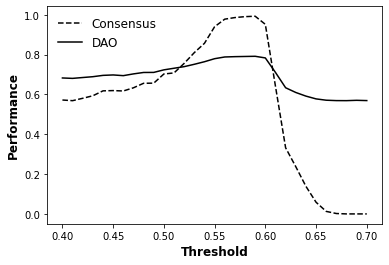

<Figure size 432x288 with 0 Axes>

In [68]:
# Performance
x = np.arange(0.40, 0.71, 0.01)
fig, (ax1) = plt.subplots(1, 1)
ax1.plot(x, dao_consensus, "k--", label="Consensus")
ax1.plot(x, dao_performance, "k-", label="DAO")
plt.xlabel('Threshold', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Performance_across_threshold.png", transparent=False, dpi=200)
plt.show()
plt.clf()

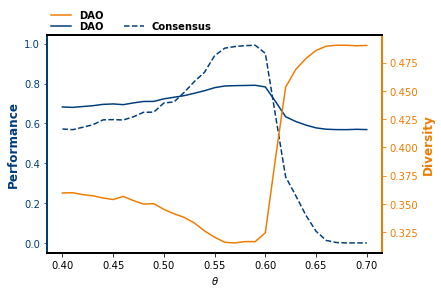

<Figure size 432x288 with 0 Axes>

In [69]:
# Twin
import numpy as np
x = np.arange(0.40, 0.71, 0.01)

nusblue = "#003D7C"
nusorange = "#EF7C00"
legend_properties = {'weight':'bold'}

fig,ax1 = plt.subplots()
ax1.set_xlabel("$\\theta$", fontsize = 10)
ax1.set_ylabel("Performance", fontweight='bold', color="black", fontsize=12)

ax2=ax1.twinx()
ax2.set_ylabel("Diversity", fontweight='bold', color="black",fontsize=12)

ax2.spines['left'].set_color(nusblue)
ax2.spines["left"].set_linewidth(2)
ax2.spines['right'].set_color(nusorange)
ax2.spines["right"].set_linewidth(2)
ax2.spines["top"].set_linewidth(2)
ax2.spines["bottom"].set_linewidth(2)
ax2.yaxis.label.set_color(nusorange)
ax2.tick_params(axis='y', colors=nusorange)

ax1.yaxis.label.set_color(nusblue)
ax1.tick_params(axis='y', colors=nusblue)

line_1 = ax1.plot(x, dao_performance, "k-", color=nusblue, label="DAO")
line_2 = ax1.plot(x, dao_consensus, "k--", color = nusblue, label="Consensus")

line_3 = ax2.plot(x, dao_diversity, "k-", color= nusorange, label="DAO")


lines_1 = line_1 + line_2
labs_1 = [l.get_label() for l in lines_1]
ax1.legend(lines_1, labs_1, frameon=False, fontsize=10, loc=(0, 1),  ncol=3, prop=legend_properties)

lines_2 = line_3
labs_2 = [l.get_label() for l in lines_1]
ax2.legend(lines_2, labs_2, frameon=False, fontsize=10, loc=(0, 1.05),  ncol=3, prop=legend_properties)

plt.savefig(data_folder + r"\Threshold_performance_diversity.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()
